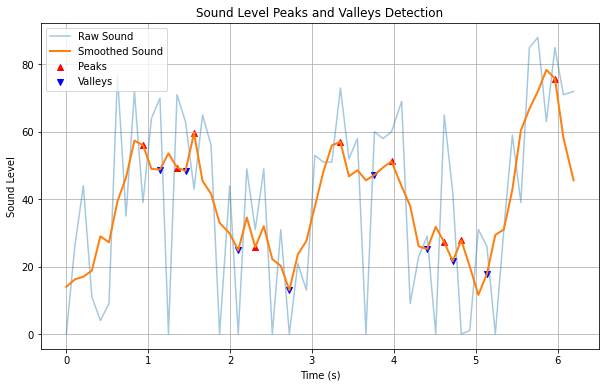

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data_a.csv")

time = df["time_ms"].values / 1000.0  # seconds
sound = df["sound_level"].values

window_size = 5
kernel = np.ones(window_size) / window_size
sound_smooth = np.convolve(sound, kernel, mode="same")

gradient = np.gradient(sound_smooth, time)

peaks = []
valleys = []

for i in range(1, len(gradient)):
    if gradient[i-1] > 0 and gradient[i] < 0:
        peaks.append(i)

    if gradient[i-1] < 0 and gradient[i] > 0:
        valleys.append(i)

plt.figure(figsize=(10, 6))

plt.plot(time, sound, label="Raw Sound", alpha=0.4)

plt.plot(time, sound_smooth, label="Smoothed Sound", linewidth=2)

plt.scatter(time[peaks], sound_smooth[peaks],
            color="red", marker="^", label="Peaks")

plt.scatter(time[valleys], sound_smooth[valleys],
            color="blue", marker="v", label="Valleys")

plt.xlabel("Time (s)")
plt.ylabel("Sound Level")
plt.title("Sound Level Peaks and Valleys Detection")
plt.legend()
plt.grid(True)

plt.savefig("sound_peaks_valleys.png")
plt.show()